# Setup and Intro to OpenAI gym


In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab?
IS_COLAB = "google.colab" in sys.modules


if IS_COLAB or IS_KAGGLE:
    !apt update && apt install -y libpq-dev libsdl2-dev swig xorg-dev xvfb
    %pip install -U tf-agents pyvirtualdisplay
    %pip install -U gym~=0.21.0
    %pip install -U gym[box2d,atari,accept-rom-license]

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# To get smooth animations
import matplotlib.animation as animation
mpl.rc('animation', html='jshtml')

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "rl"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
import gym

In [13]:
env = gym.make('CartPole-v1',render_mode="rgb_array")

In [14]:
obs = env.reset()

In [192]:
env.np_random.random(32)
obs

array([-0.2303003 , -0.9796561 ,  0.21622495,  1.1510738 ], dtype=float32)

In [ ]:
try:
  import pyvirtualdisplay
  display = pyvirtualdisplay.Display(visible=0, size=(1400, 900)).start()
  print('worked')
except ImportError:
  pass

In [193]:
img = env.render()

In [194]:
img.shape

(400, 600, 3)

In [195]:
def plt_env(env):
    plt.figure(figsize=(5,4))
    img = env.render()
    plt.imshow(img)
    plt.axis("off")
    return img 

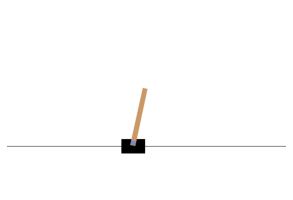

In [196]:
plt_env(env)
plt.show()

In [22]:
env.action_space

Discrete(2)

In [ ]:
<dl>
<dt>First Term</dt>
<dd>This is the definition of the first term.</dd>
<dt>Second Term</dt>
<dd>This is one definition of the second term. </dd>
<dd>This is another definition of the second term.</dd>
</dl>

In [36]:
action = 0
stats=env.step(action)
obs = stats[0]
reward = stats[1]
done = stats[2]
info = stats[3]

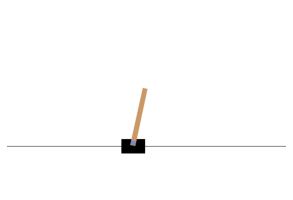

In [197]:
plt_env(env)
plt.show()

In [191]:
save_fig("cart_pole_plot")

Saving figure cart_pole_plot


<Figure size 432x288 with 0 Axes>

In [198]:
print(obs)
print(reward)
print(done)
print(info)

[-0.2303003  -0.9796561   0.21622495  1.1510738 ]
1.0
True
False


In [40]:
if done:
    obs = env.reset()

# Creating a Simple-Hardcoded Policy

In [158]:
def basic_policy(obs):
    angle = obs[2]
    return 0 if angle < 0 else 1 

In [184]:
import array
from numpy.core.memmap import dtype

env.np_random.random(32)
totals=[] 

for episode in range(500):
    episode_rewards = 0 
    obs = env.reset()
    obs = np.array(obs[0])

    for step in range(200):
        #action will either be 0 or 1 
        action = basic_policy(obs)
        #get all information from each action 
        stats = env.step(action)
        obs = np.array(stats[0])
        reward = stats[1]
        done = stats[2]
        info = stats[3]

        episode_rewards += reward 

        if done: 
            break
    totals.append(episode_rewards) 

In [199]:
print('mean',np.mean(totals) ,np.std(totals),np.min(totals),np.max(totals))


mean 42.992 8.717105941767601 24.0 72.0


In [186]:
env.np_random.random(32)

frames = [] 

obs = env.reset()
obs = np.array(obs[0])
for step in range(200):
    img = env.render()
    frames.append(img)
    action = basic_policy(obs)

    stats=env.step(action)
    obs = np.array(stats[0])
    reward = stats[1]
    done = stats[2]
    info = stats[3]

    if done: 
    break

# Visualization

In [189]:
def update_scene(num,frames,patch): 
    patch.set_data(frames[num])
    return patch

def plot_animation(frames,repeat=False,interval=40):
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    anim = animation.FuncAnimation(fig,update_scene, fargs=(frames,patch),
                                 frames=len(frames),repeat=repeat,interval=interval)

    plt.close()
    return anim 

In [190]:
plot_animation(frames)